In [ ]:
#Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Code

Download and save the file weight-height.csv into your drive (from https://www.kaggle.com/mustafaali96/weight-height)

With that dataset,  plot histograms, kernel density estimation and Gaussian distribution with MLE for the followings:


*   Height all
*   Height Male
*   Height Female
*   Weight all
*   Weight Male
*   Weight Female

For the histograms, you can use any module. However, you have to implement from scratch the code for the kernel density estimation and Gaussian distribution with MLE (you cannot use any specialized library to compute it.) To plot, you can use any library you want.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

#load data
data = pd.read_csv('/content/drive/MyDrive/MachineLearning/weight-height.csv')

data.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
# function fro plotting three graph

def plot_all(data,label):
  mu = data.sum()/len(data)
  sig = ((data-mu)**2).sum()/len(data)
  def gd(x):
    return np.exp(-1/2*(((x-mu)**2)/sig))/(np.sqrt(sig)*np.sqrt(2*np.pi))

  def K(z):
    return np.exp(-1/2*z*z)/((2*np.pi)**(1/2))
  def kde(x):
    h=1.06*np.sqrt(sig)*len(data)**(-1/5)
    s=0
    for i in data:
      s+=K((x-i)/h)
    return s/(len(data)*h)

  x = np.linspace(data.min(),data.max(),len(data))
  plt.hist(data,density=True)
  plt.plot(x,gd(x))
  plt.plot(x,kde(x))
  plt.title(label)
  plt.show()



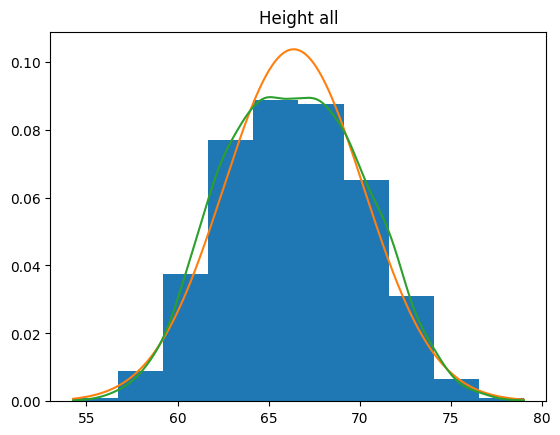

In [ ]:
# Height all
plot_all(data.Height,"Height all")

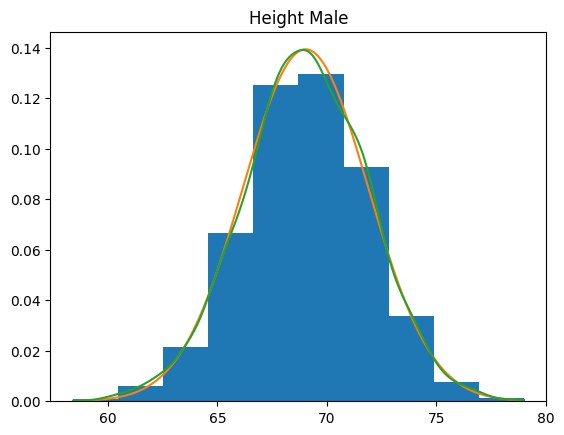

In [ ]:
# Height Male
plot_all(data.Height[data['Gender']=="Male"],"Height Male")

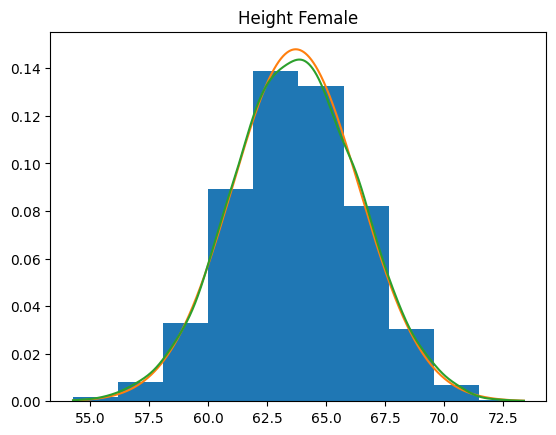

In [ ]:
# Height Female
plot_all(data.Height[data['Gender']=="Female"],"Height Female")

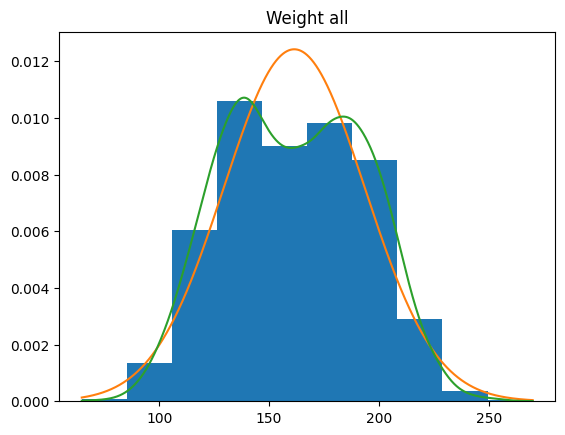

In [ ]:
# Weight all
plot_all(data.Weight,"Weight all")

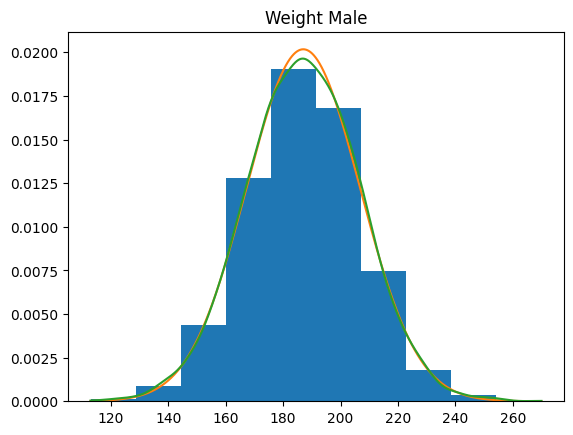

In [ ]:
# Weight Male
plot_all(data.Weight[data['Gender']=="Male"],"Weight Male")

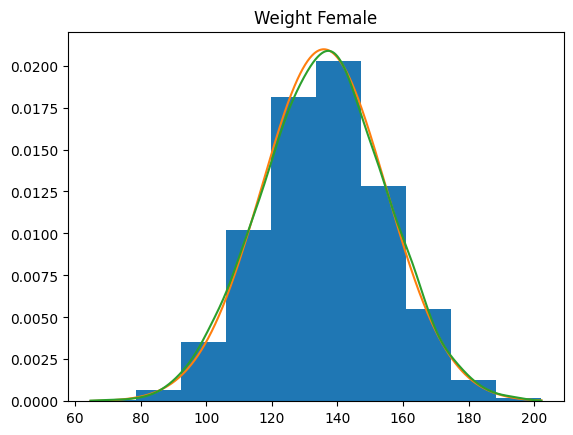

In [ ]:
# Weight Female
plot_all(data.Weight[data['Gender']=="Female"],"Weight Female")

# Report

1.   Why do we need to apply these kinds of distribution estimations, in general terms? What kind of in formation can they provide and how can we use it?
2.   Explain the parameters you chose for the histogram plot. Why did you choose these ones? Which criteria did you follow?
3.   Explain the parameters you chose for the KDE and Gaussian plot. Why did you choose these ones? Which criteria did you follow?
4.   Do you observe any distribution having more than one peak? Which ones? What does it mean?
5.   Make a case with pros and cons of each estimation method. Why can we conclude there is no one 'perfect' method for these estimations?
6.   Conclude with some thoughts and things you learned from this homework.

1.
Through these applications, we can visualize the overall data distribution like which values have more volumes than other values in a dataset, and by the shape of the dataset, we can guess many other aspect of the data.

2.
I used parameter "density=True" because without this parameter, the Y axis is actual count of data, but we needed persent value of 0 to 1 so that we can compare with other graphs.

3.
For x axis, I used "np.linspace(data.min(),data.max(),len(data))", most common way to plot distribution, and for y axis, I used the values that applied function for KDE or Gaussian with x value.

4.
The 'Weight all' distribution having more than one peak. It means that Gaussian distribution can't fully represent the distribution of this data because it's heightest data groups are not continuous.

5.
case histogram: simple to plot and analysis, not continuous and not precise
case KDE: can plot many peak and more smooth, but need to chose good bandwidth
case Gaussian: most widely used in many ways, but depends on data actual shape
Data can be any kind of shape, and there are outliers as well. Therefore, it's impossible to represent that data with one distribution method perfectly.

6.
I learned how to implement and visualize distribution estimations for given data. It was a good experience to practice it from the scratch.


I used genAI with these prompts.

"how to apply same calculation to every data in a dataset",
"how to compute h in kde",
"how to plot distribution with given function"
